In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
# CSV file path in Google Drive
# file_path = '/content/drive/MyDrive/Dataset/DigitalExposome Dataset.csv'
file_path = '../DigitalExposome Dataset.csv'
# Load dataset using Pandas
df = pd.read_csv(file_path)

# Display the top 5 rows of the dataset
df.head()

,IBI,HR,NO2,Noise,NH3,PM10,CO,PM25,Label,PM1,EDA,BVP
0,0.0,0.377574,0.0,0.511358,0.003018,0.003091,0.871758,0.000000,5,0.000000,0.0,0.0
1,0.0,0.196398,0.0,0.490903,0.003018,0.003091,0.876848,0.003091,5,0.001854,0.0,0.0
2,0.0,0.454163,0.0,0.470449,0.006036,0.006181,0.881939,0.006181,5,0.003709,0.0,0.0
3,0.0,0.322451,0.0,0.449995,0.009055,0.009272,0.887030,0.009272,5,0.005563,0.0,0.0
4,0.0,0.237595,0.0,0.429540,0.012073,0.012362,0.892121,0.012362,5,0.007417,0.0,0.0


In [3]:
df.describe()

,IBI,HR,NO2,Noise,NH3,PM10,CO,PM25,Label,PM1,EDA,BVP
count,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000
mean,0.178688,0.530687,0.502239,0.427541,0.564276,0.208474,0.679874,0.224901,3.326185,0.230773,0.260318,0.482902
std,0.230127,0.266531,0.274914,0.247601,0.294515,0.210981,0.308111,0.223242,1.599863,0.255253,0.221725,0.175569
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.309505,0.285412,0.214008,0.305285,0.017624,0.458047,0.012362,2.000000,0.006310,0.060686,0.449963
50%,0.016760,0.491213,0.489703,0.403671,0.644756,0.158454,0.805352,0.176150,4.000000,0.176316,0.216064,0.512280
75%,0.309984,0.776388,0.736983,0.618592,0.826943,0.326889,0.909832,0.376813,5.000000,0.407268,0.421109,0.579756
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,5.000000,24.000000,1.000000,1.000000


In [4]:
print("Shape:", df.shape)
print("Columns:", df.columns)

Shape: (42436, 12)
Columns: Index(['IBI', 'HR', 'NO2', 'Noise', 'NH3', 'PM10', 'CO', 'PM25', 'Label',
       'PM1', 'EDA', 'BVP'],
      dtype='object')


# Check Data type

In [5]:
print("\nData Types:")
df.info()


Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42436 entries, 0 to 42435
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IBI     42436 non-null  float64
 1   HR      42436 non-null  float64
 2   NO2     42436 non-null  float64
 3   Noise   42436 non-null  float64
 4   NH3     42436 non-null  float64
 5   PM10    42436 non-null  float64
 6   CO      42436 non-null  float64
 7   PM25    42436 non-null  float64
 8   Label   42436 non-null  int64  
 9   PM1     42436 non-null  float64
 10  EDA     42436 non-null  float64
 11  BVP     42436 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 3.9 MB


In [6]:
# cek missing value
df.isnull().sum()

IBI      0
HR       0
NO2      0
Noise    0
NH3      0
PM10     0
CO       0
PM25     0
Label    0
PM1      0
EDA      0
BVP      0
dtype: int64

In [7]:
# Duplicated
df.duplicated().sum()

14342

In [8]:
# Cek data NaN
df.isna().sum()

IBI      0
HR       0
NO2      0
Noise    0
NH3      0
PM10     0
CO       0
PM25     0
Label    0
PM1      0
EDA      0
BVP      0
dtype: int64

## Prepocessing

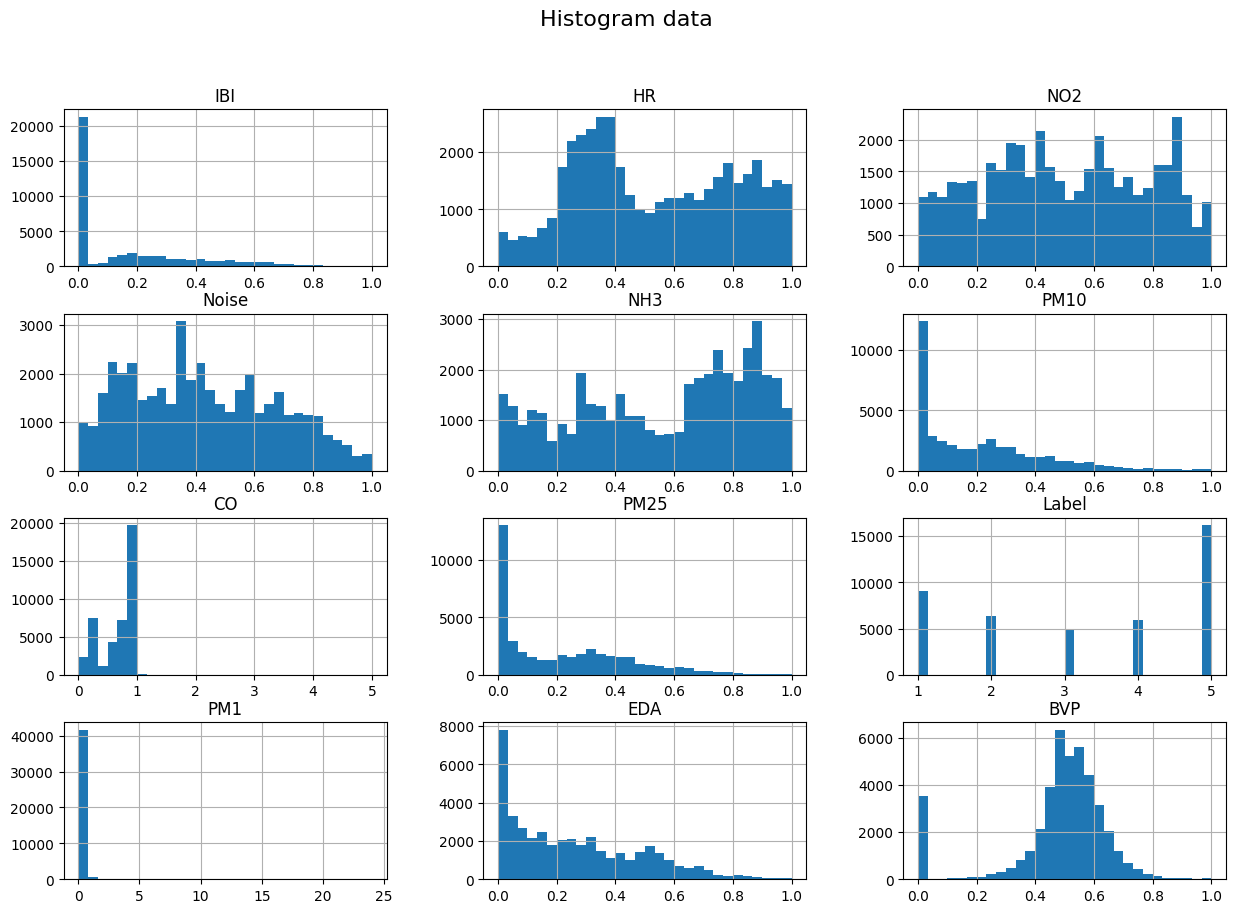

In [9]:
df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histogram data", fontsize=16)
plt.show()

In [10]:
df.shape

(42436, 12)

/var/folders/c1/0skxdwdx0zdcpl8hlxr2xcz40000gn/T/ipykernel_15590/3045415140.py:22: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
/Users/muhammadzuamaalamin/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


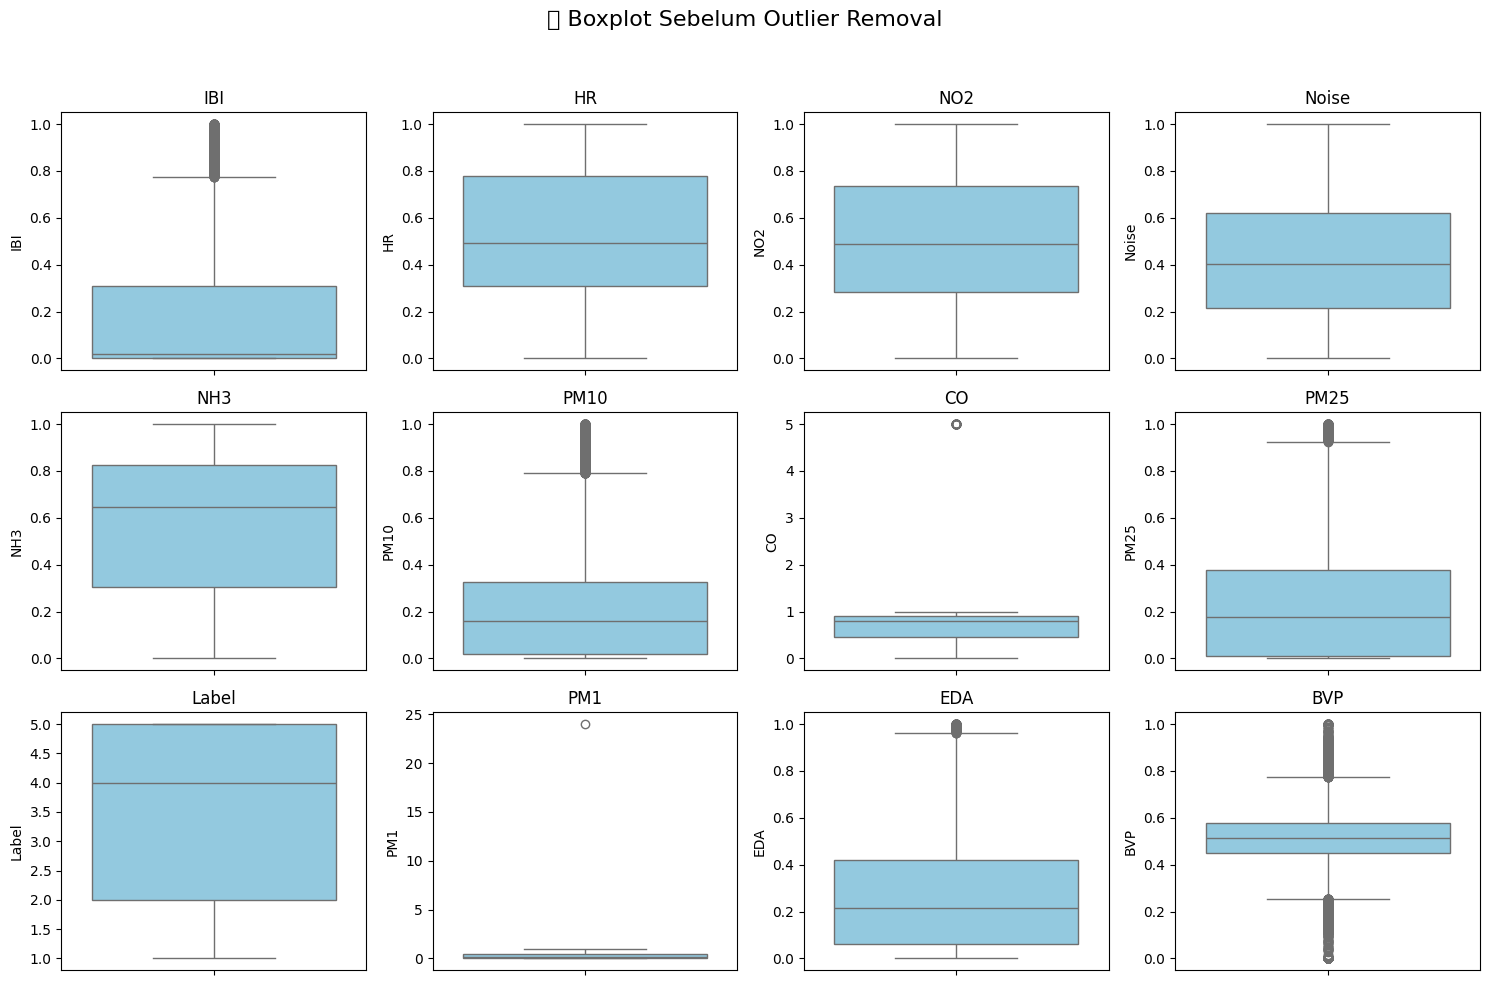

In [11]:
# Simpan salinan data sebelum outlier removal (untuk visualisasi)
df_before_outlier = df.copy()
import matplotlib.pyplot as plt
import seaborn as sns

# Buat grid layout otomatis sesuai jumlah kolom
n_cols = 4  # jumlah boxplot per baris
n_rows = -(-len(df.columns) // n_cols)  # ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()  # supaya bisa diiterasi

for i, col in enumerate(df.columns):
    sns.boxplot(y=df_before_outlier[col], color='skyblue', ax=axes[i])
    axes[i].set_title(f"{col}")

# Hapus axis kosong kalau jumlah kolom tidak pas
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("📊 Boxplot Sebelum Outlier Removal", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [12]:
### Outlier Detection and Removal using Z-score
z_scores = np.abs(stats.zscore(df))
df = df[(z_scores < 3).all(axis=1)]  # Keep only rows where all Z-scores < 3

In [13]:
print("Shape after removing outliers:", df.shape)

Shape after removing outliers: (41189, 12)



📊 Boxplot Setelah Outlier Removal


/var/folders/c1/0skxdwdx0zdcpl8hlxr2xcz40000gn/T/ipykernel_15590/230769811.py:25: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
/Users/muhammadzuamaalamin/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


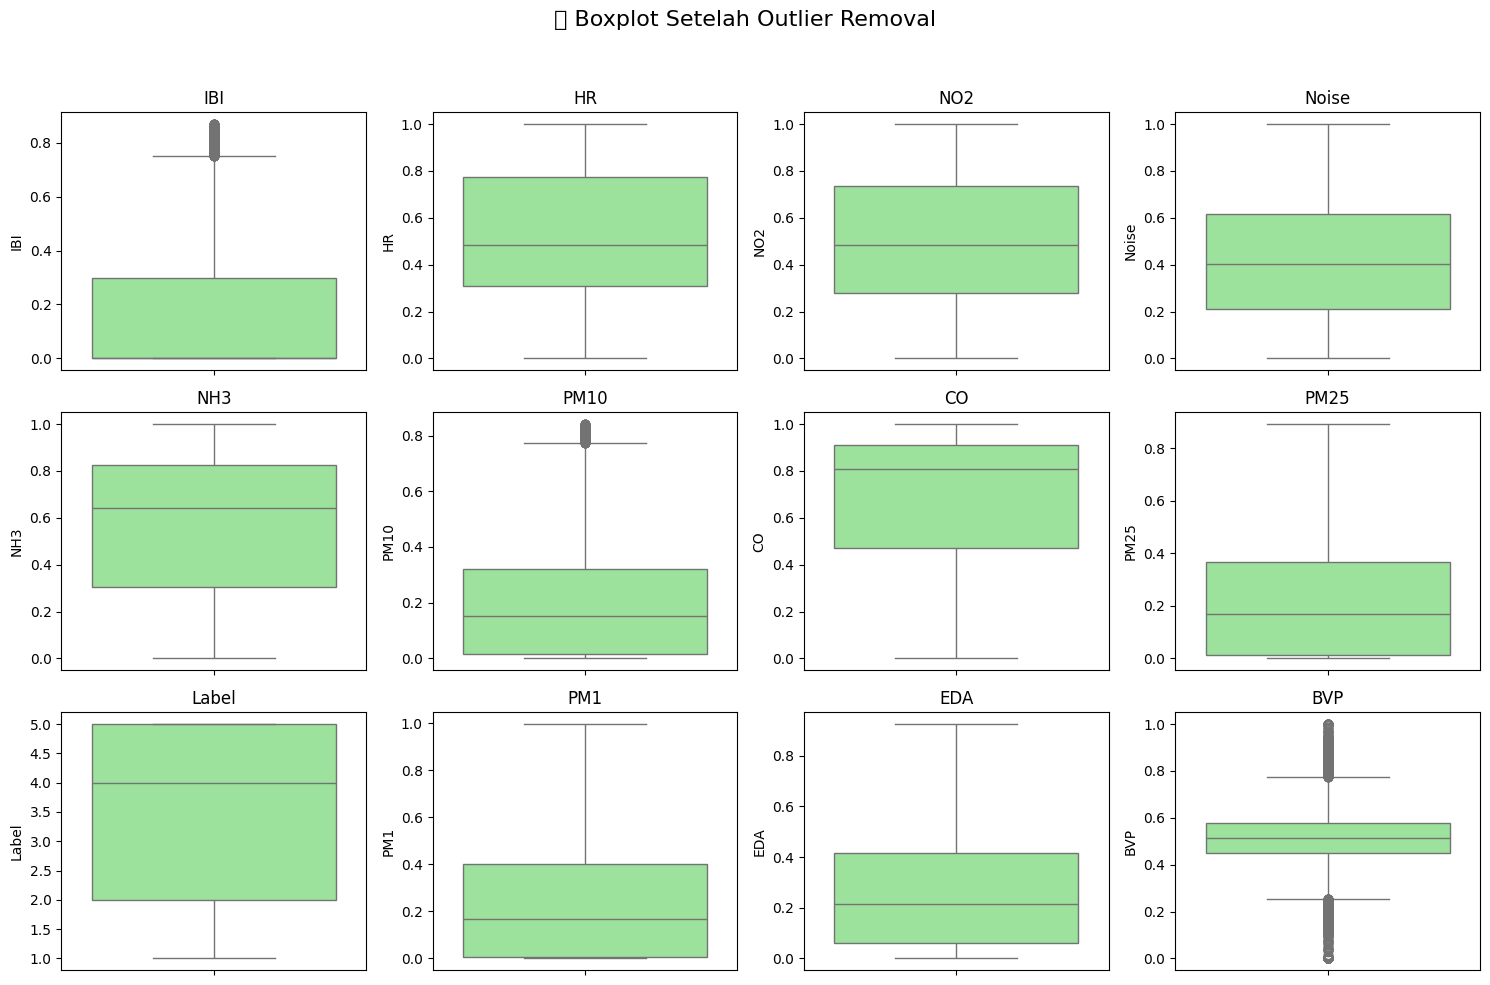

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\n📊 Boxplot Setelah Outlier Removal")

# Tentukan layout grid
n_cols = 4  # jumlah boxplot per baris
n_rows = -(-len(df.columns) // n_cols)  # ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()

# Loop setiap kolom dan pasang boxplot ke grid
for i, col in enumerate(df.columns):
    sns.boxplot(y=df[col], color='lightgreen', ax=axes[i])
    axes[i].set_title(col)

# Hapus subplot kosong kalau jumlah kolom tidak pas
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Judul utama
fig.suptitle("📊 Boxplot Setelah Outlier Removal", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


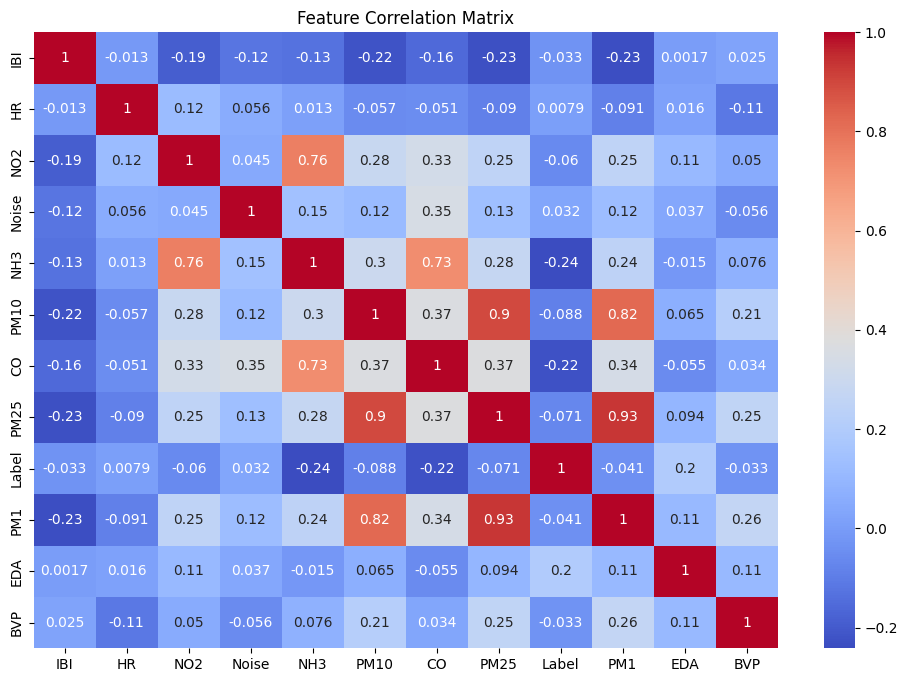

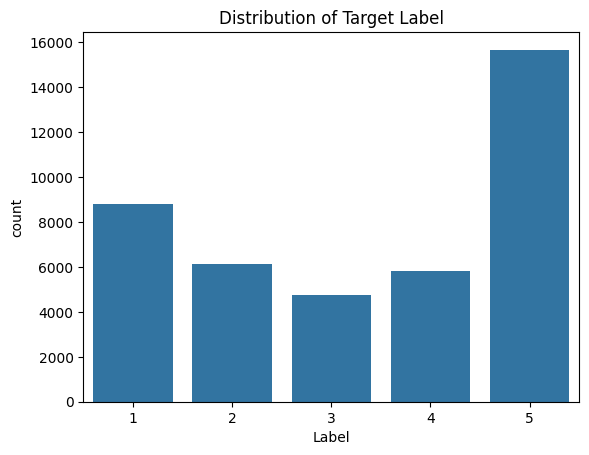

In [15]:
# Heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

# Distribusi Label
sns.countplot(x='Label', data=df)
plt.title("Distribution of Target Label")
plt.show()

In [16]:
# Memisahkan fitur (X) dan label (y)
X = df.drop('Label', axis=1)
y = df['Label']

print("Shape of features (X):", X.shape)
print("Shape of target (y):", y.shape)

Shape of features (X): (41189, 11)
Shape of target (y): (41189,)


In [17]:
print(X.info())
print(y.value_counts())

<class 'pandas.core.frame.DataFrame'>
Index: 41189 entries, 0 to 42435
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IBI     41189 non-null  float64
 1   HR      41189 non-null  float64
 2   NO2     41189 non-null  float64
 3   Noise   41189 non-null  float64
 4   NH3     41189 non-null  float64
 5   PM10    41189 non-null  float64
 6   CO      41189 non-null  float64
 7   PM25    41189 non-null  float64
 8   PM1     41189 non-null  float64
 9   EDA     41189 non-null  float64
 10  BVP     41189 non-null  float64
dtypes: float64(11)
memory usage: 3.8 MB
None
Label
5    15671
1     8805
2     6137
4     5835
3     4741
Name: count, dtype: int64


In [18]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

# Split train-test dulu
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Buat undersampler
rus = RandomUnderSampler(random_state=42)

# Hanya resample data training
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

print("Train balanced:", X_train_rus.shape)
print(y_train_rus.value_counts(), "\n")

print("Test original:", X_test.shape)
print(y_test.value_counts())


Train balanced: (18965, 11)
Label
1    3793
2    3793
3    3793
4    3793
5    3793
Name: count, dtype: int64 

Test original: (8238, 11)
Label
5    3134
1    1761
2    1228
4    1167
3     948
Name: count, dtype: int64


## Prepocessing

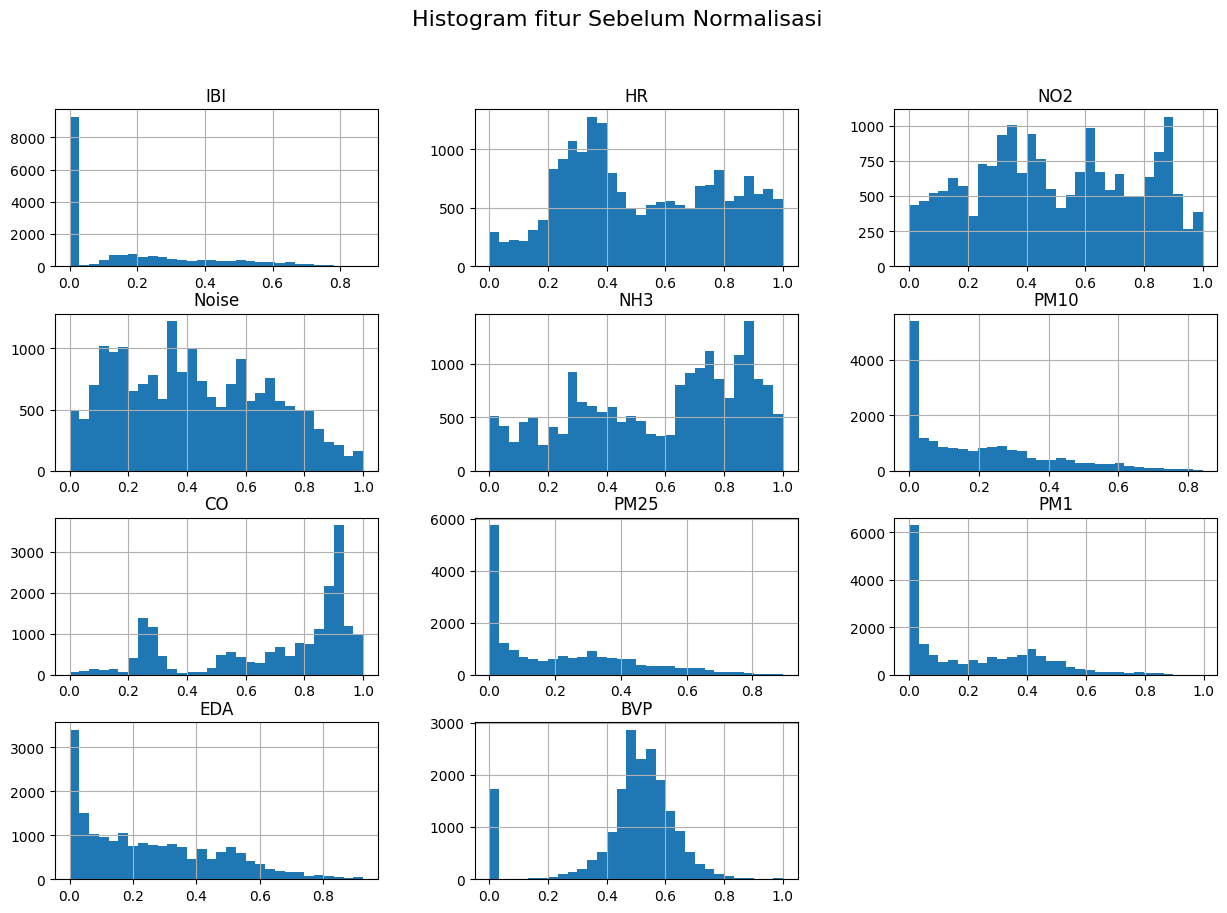

In [19]:
# Histogram sebelum normalisasi
X_train_rus.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histogram fitur Sebelum Normalisasi", fontsize=16)
plt.show()

In [20]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_rus)
X_test_scaled = scaler.transform(X_test)

print(f"Data Train after normalisation = {X_train_scaled.shape}")
print(f"Data Test after normalisation = {X_test_scaled.shape}")

Data Train after normalisation = (18965, 11)
Data Test after normalisation = (8238, 11)


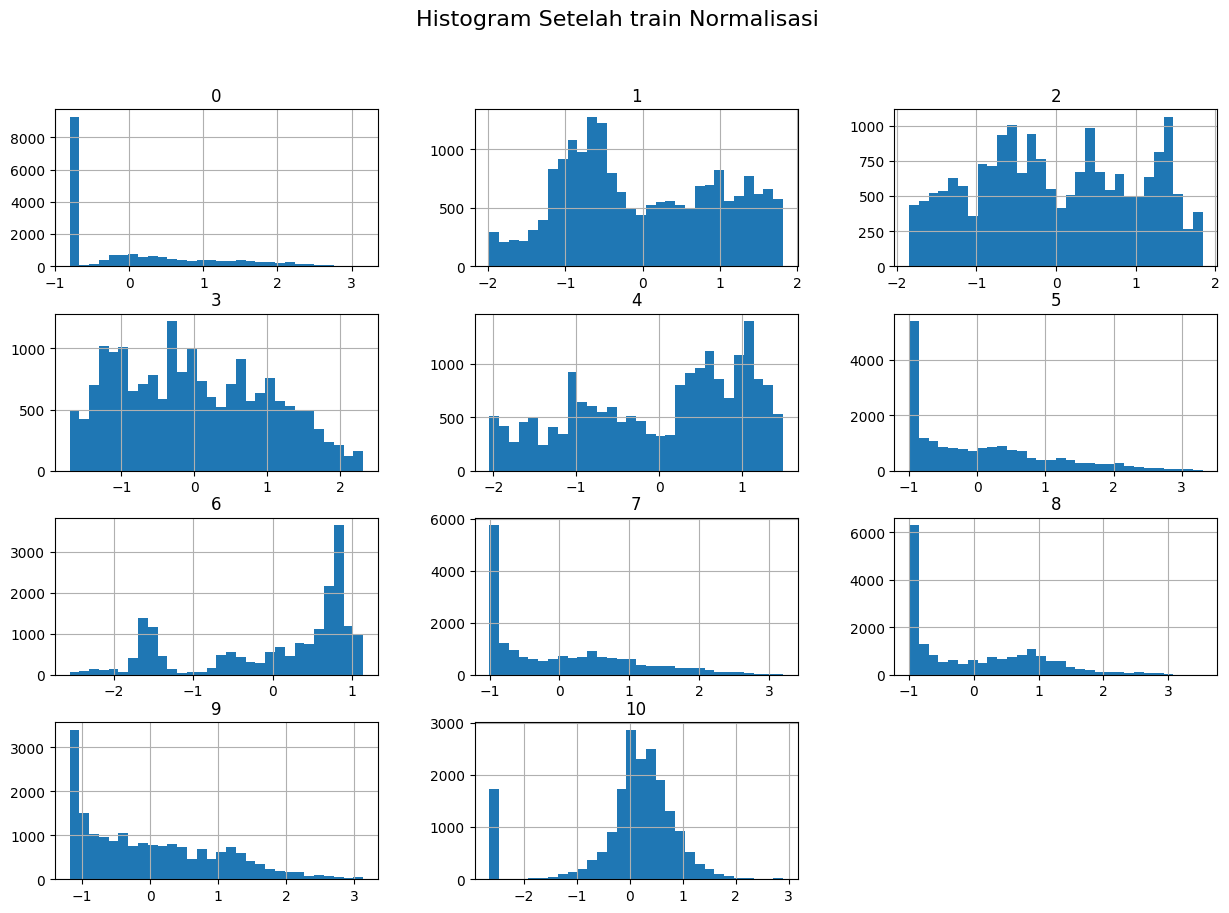

In [21]:
# Histogram setelah normalisasi
X_train_scaled_df = pd.DataFrame(X_train_scaled)
X_train_scaled_df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histogram Setelah train Normalisasi", fontsize=16)
plt.show()

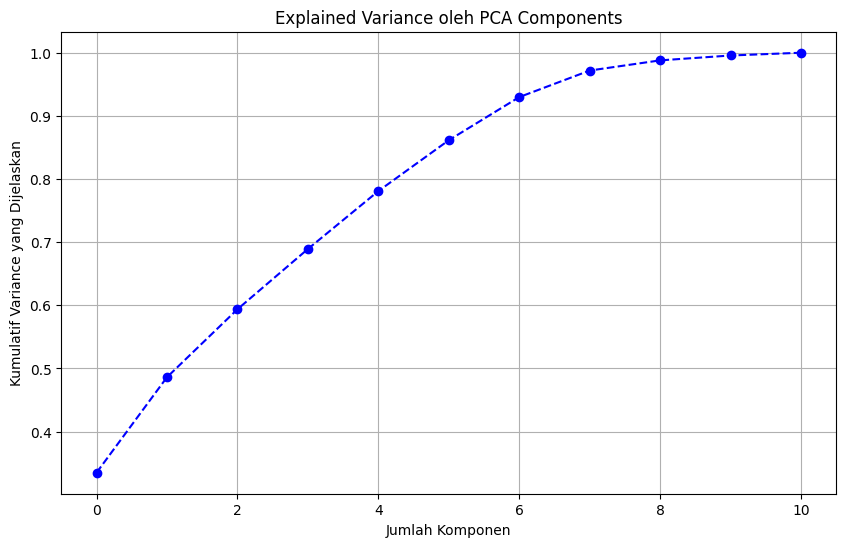

In [22]:
# Inisialisasi PCA tanpa mengurangi dimensi dulu (hanya untuk melihat explained variance)
pca = PCA(n_components=None) # Set n_components to None to keep all components initially
pca.fit(X_train_scaled)

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.xlabel('Jumlah Komponen')
plt.ylabel('Kumulatif Variance yang Dijelaskan')
plt.title('Explained Variance oleh PCA Components')
plt.grid(True)
plt.show()

In [23]:
# Tampilkan variansi kumulatif
explained_variance = np.cumsum(pca.explained_variance_ratio_)
for i, var in enumerate(explained_variance):
    print(f"Komponen ke-{i+1}: {var:.4f} variance terjelaskan")

# Misal ingin menyimpan komponen yang menjelaskan >=90% variance
n_components = np.argmax(explained_variance >= 0.90) + 1
print(f"\n🔍 Jumlah komponen optimal (≥90% variance): {n_components}")

Komponen ke-1: 0.3349 variance terjelaskan
Komponen ke-2: 0.4862 variance terjelaskan
Komponen ke-3: 0.5937 variance terjelaskan
Komponen ke-4: 0.6892 variance terjelaskan
Komponen ke-5: 0.7809 variance terjelaskan
Komponen ke-6: 0.8614 variance terjelaskan
Komponen ke-7: 0.9297 variance terjelaskan
Komponen ke-8: 0.9718 variance terjelaskan
Komponen ke-9: 0.9879 variance terjelaskan
Komponen ke-10: 0.9956 variance terjelaskan
Komponen ke-11: 1.0000 variance terjelaskan

🔍 Jumlah komponen optimal (≥90% variance): 7


In [24]:
from sklearn.decomposition import PCA

# Inisialisasi PCA dengan 7 komponen
pca = PCA(n_components=7)

# Fit hanya di data train
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform data test pakai PCA yang sudah fit dari train
X_test_pca = pca.transform(X_test_scaled)

print("Shape train PCA:", X_train_pca.shape)
print("Shape test PCA:", X_test_pca.shape)


Shape train PCA: (18965, 7)
Shape test PCA: (8238, 7)


## Training Data

In [25]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, KFold
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def evaluate_models(X_train, X_test, y_train, y_test, percobaan="Baseline", output_file="results.csv", cv=5):
    # Daftar model
    models = {
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
        "KNN": KNeighborsClassifier(n_neighbors=5),
        "Naive Bayes": GaussianNB(),
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "Extra Trees" : ExtraTreesClassifier(n_estimators=100, random_state=42)
    }

    rows = []
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)

    for name, model in models.items():
        print(f"\n🔹 Training {name}...")

        # Training pada train-test split
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Evaluasi test split
        report = classification_report(y_test, y_pred, output_dict=True)

        # Evaluasi cross-validation
        cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring="accuracy")

        # Simpan hasil ke list
        rows.append({
            "Percobaan": percobaan,
            "Model": name,
            "Accuracy_Test": report["accuracy"],
            "Precision_Test": report["macro avg"]["precision"],
            "Recall_Test": report["macro avg"]["recall"],
            "F1-Score_Test": report["macro avg"]["f1-score"],
            "CV_Mean": cv_scores.mean(),
            "CV_Std": cv_scores.std()
        })

    # Buat dataframe hasil
    df_results = pd.DataFrame(rows)
    print("\n📊 Perbandingan Model:")
    print(df_results)

    # Simpan ke CSV (append kalau sudah ada)
    try:
        existing = pd.read_csv(output_file)
        df_results = pd.concat([existing, df_results], ignore_index=True)
    except FileNotFoundError:
        pass
    df_results.to_csv(output_file, index=False)

    # Visualisasi perbandingan hasil test split
    df_plot = df_results[df_results["Percobaan"] == percobaan].set_index("Model")[["Accuracy_Test", "Precision_Test", "Recall_Test", "F1-Score_Test", "CV_Mean"]]
    df_plot.plot(kind="bar", figsize=(12,6))
    plt.title(f"Perbandingan Model - {percobaan}")
    plt.ylabel("Score")
    plt.xticks(rotation=0)
    plt.legend(loc="lower right")
    plt.show()
    
    return df_results



🔹 Training Random Forest...

🔹 Training KNN...

🔹 Training Naive Bayes...

🔹 Training Decision Tree...

🔹 Training Extra Trees...

📊 Perbandingan Model:
                               Percobaan          Model  Accuracy_Test  \
0  Kfold CV model baseline undersampling  Random Forest       0.973659   
1  Kfold CV model baseline undersampling            KNN       0.920248   
2  Kfold CV model baseline undersampling    Naive Bayes       0.381160   
3  Kfold CV model baseline undersampling  Decision Tree       0.944890   
4  Kfold CV model baseline undersampling    Extra Trees       0.978029   

   Precision_Test  Recall_Test  F1-Score_Test   CV_Mean    CV_Std  
0        0.967516     0.974721       0.971030  0.968626  0.001788  
1        0.901135     0.926030       0.912204  0.913999  0.002509  
2        0.391466     0.405784       0.356952  0.398629  0.005164  
3        0.935000     0.951698       0.942849  0.933087  0.001047  
4        0.972975     0.978197       0.975534  0.971843  0.00

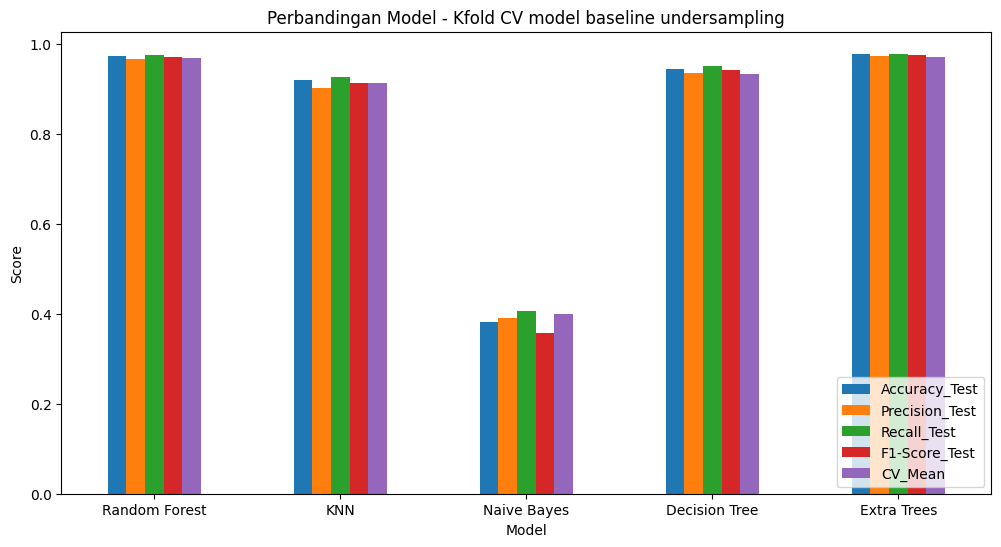

In [26]:
results = evaluate_models(
    X_train_rus, X_test, y_train_rus, y_test,
    percobaan="Kfold CV model baseline undersampling",
    output_file="results.csv",
    cv=5  # jumlah fold cross-validation
)


🔹 Training Random Forest...

🔹 Training KNN...

🔹 Training Naive Bayes...

🔹 Training Decision Tree...

🔹 Training Extra Trees...

📊 Perbandingan Model:
                                   Percobaan          Model  Accuracy_Test  \
0  Kfold CV model normalisasi undersamplingg  Random Forest       0.973901   
1  Kfold CV model normalisasi undersamplingg            KNN       0.905195   
2  Kfold CV model normalisasi undersamplingg    Naive Bayes       0.381160   
3  Kfold CV model normalisasi undersamplingg  Decision Tree       0.944404   
4  Kfold CV model normalisasi undersamplingg    Extra Trees       0.978029   

   Precision_Test  Recall_Test  F1-Score_Test   CV_Mean    CV_Std  
0        0.967927     0.974898       0.971328  0.968996  0.001754  
1        0.884134     0.912228       0.896326  0.900659  0.002024  
2        0.391466     0.405784       0.356952  0.398629  0.005164  
3        0.934403     0.951087       0.942249  0.933298  0.001237  
4        0.972975     0.978197       

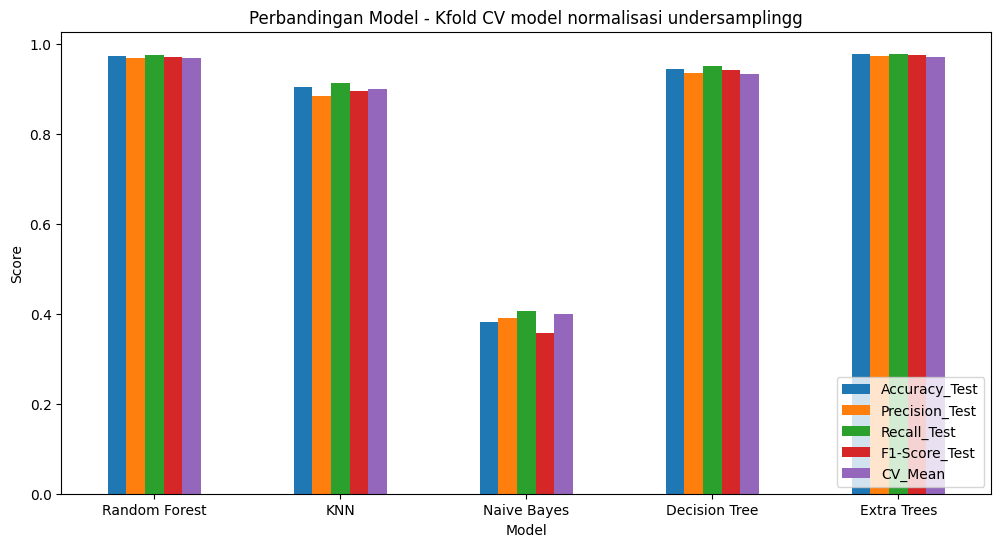

In [27]:
results = evaluate_models(
    X_train_scaled, X_test_scaled, y_train_rus, y_test,
    percobaan="Kfold CV model normalisasi undersamplingg",
    output_file="results.csv",
    cv=5  # jumlah fold cross-validation
)

In [28]:
from sklearn.decomposition import PCA

# Inisialisasi PCA dengan 7 komponen
pca = PCA(n_components=7)

# Fit hanya di data train
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform data test pakai PCA yang sudah fit dari train
X_test_pca = pca.transform(X_test_scaled)

print("Shape train PCA:", X_train_pca.shape)
print("Shape test PCA:", X_test_pca.shape)


Shape train PCA: (18965, 7)
Shape test PCA: (8238, 7)



🔹 Training Random Forest...

🔹 Training KNN...

🔹 Training Naive Bayes...

🔹 Training Decision Tree...

🔹 Training Extra Trees...

📊 Perbandingan Model:
                            Percobaan          Model  Accuracy_Test  \
0  Kfold CV model pca 7 undersampling  Random Forest       0.923161   
1  Kfold CV model pca 7 undersampling            KNN       0.880432   
2  Kfold CV model pca 7 undersampling    Naive Bayes       0.420248   
3  Kfold CV model pca 7 undersampling  Decision Tree       0.857975   
4  Kfold CV model pca 7 undersampling    Extra Trees       0.934329   

   Precision_Test  Recall_Test  F1-Score_Test   CV_Mean    CV_Std  
0        0.910734     0.927845       0.918690  0.910414  0.004275  
1        0.856821     0.889592       0.870635  0.873820  0.005108  
2        0.424022     0.461525       0.413534  0.453836  0.006987  
3        0.837794     0.871056       0.851625  0.840970  0.003674  
4        0.922237     0.937454       0.929428  0.922489  0.004074  


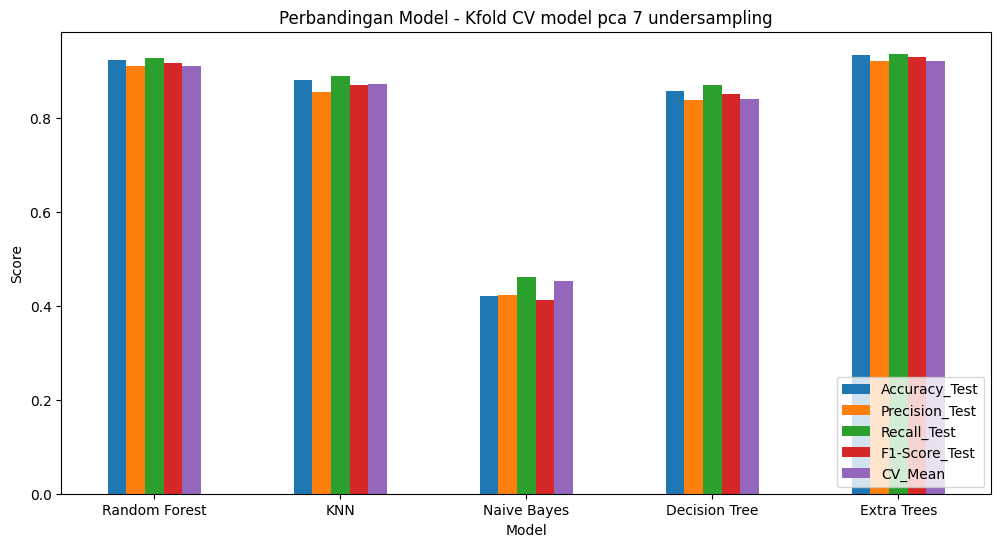

In [29]:
results = evaluate_models(
    X_train_pca, X_test_pca, y_train_rus, y_test,
    percobaan="Kfold CV model pca 7 undersampling",
    output_file="results.csv",
    cv=5  # jumlah fold cross-validation
)

In [30]:
from sklearn.decomposition import PCA

# Inisialisasi PCA dengan 6 komponen
pca = PCA(n_components=6)

# Fit hanya di data train
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform data test pakai PCA yang sudah fit dari train
X_test_pca = pca.transform(X_test_scaled)

print("Shape train PCA:", X_train_pca.shape)
print("Shape test PCA:", X_test_pca.shape)


Shape train PCA: (18965, 6)
Shape test PCA: (8238, 6)



🔹 Training Random Forest...

🔹 Training KNN...

🔹 Training Naive Bayes...

🔹 Training Decision Tree...

🔹 Training Extra Trees...

📊 Perbandingan Model:
                            Percobaan          Model  Accuracy_Test  \
0  Kfold CV model pca 6 undersampling  Random Forest       0.921583   
1  Kfold CV model pca 6 undersampling            KNN       0.887594   
2  Kfold CV model pca 6 undersampling    Naive Bayes       0.417334   
3  Kfold CV model pca 6 undersampling  Decision Tree       0.853605   
4  Kfold CV model pca 6 undersampling    Extra Trees       0.930444   

   Precision_Test  Recall_Test  F1-Score_Test   CV_Mean    CV_Std  
0        0.908153     0.928389       0.917379  0.912629  0.003993  
1        0.864942     0.896765       0.878492  0.883100  0.003775  
2        0.423301     0.460056       0.409881  0.448616  0.008249  
3        0.833611     0.867959       0.847961  0.842447  0.007026  
4        0.917100     0.934142       0.925035  0.925336  0.003390  


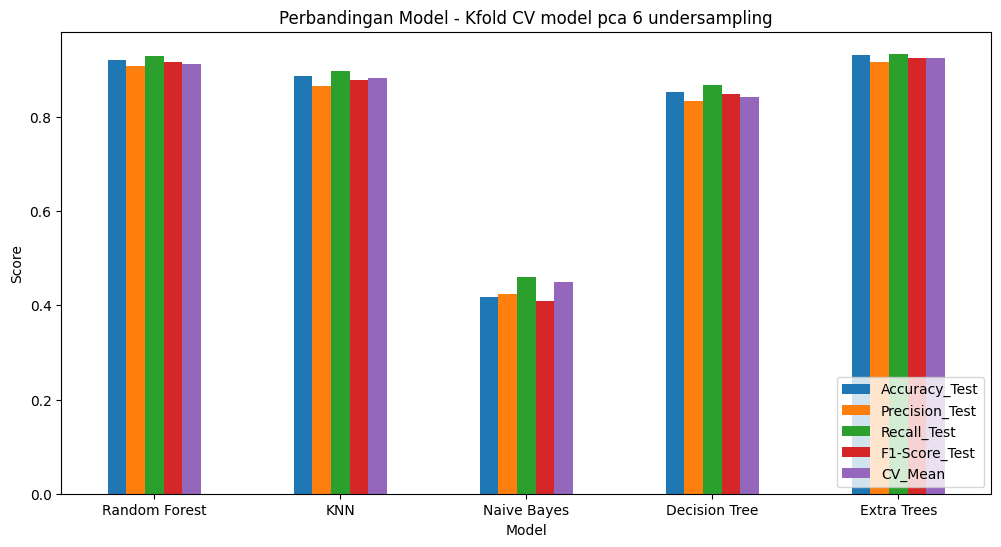

In [31]:
results = evaluate_models(
    X_train_pca, X_test_pca, y_train_rus, y_test,
    percobaan="Kfold CV model pca 6 undersampling",
    output_file="results.csv",
    cv=5  # jumlah fold cross-validation
)

In [32]:
from sklearn.decomposition import PCA

# Inisialisasi PCA dengan 6 komponen
pca = PCA(n_components=5)

# Fit hanya di data train
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform data test pakai PCA yang sudah fit dari train
X_test_pca = pca.transform(X_test_scaled)

print("Shape train PCA:", X_train_pca.shape)
print("Shape test PCA:", X_test_pca.shape)


Shape train PCA: (18965, 5)
Shape test PCA: (8238, 5)



🔹 Training Random Forest...

🔹 Training KNN...

🔹 Training Naive Bayes...

🔹 Training Decision Tree...

🔹 Training Extra Trees...

📊 Perbandingan Model:
                            Percobaan          Model  Accuracy_Test  \
0  Kfold CV model pca 5 undersampling  Random Forest       0.895120   
1  Kfold CV model pca 5 undersampling            KNN       0.855547   
2  Kfold CV model pca 5 undersampling    Naive Bayes       0.386987   
3  Kfold CV model pca 5 undersampling  Decision Tree       0.835882   
4  Kfold CV model pca 5 undersampling    Extra Trees       0.909201   

   Precision_Test  Recall_Test  F1-Score_Test   CV_Mean    CV_Std  
0        0.878120     0.907120       0.890878  0.888901  0.001754  
1        0.831740     0.872776       0.848142  0.856842  0.004893  
2        0.394272     0.421253       0.376824  0.415291  0.007947  
3        0.815192     0.852834       0.830131  0.825204  0.007119  
4        0.893975     0.919154       0.905345  0.902821  0.003240  


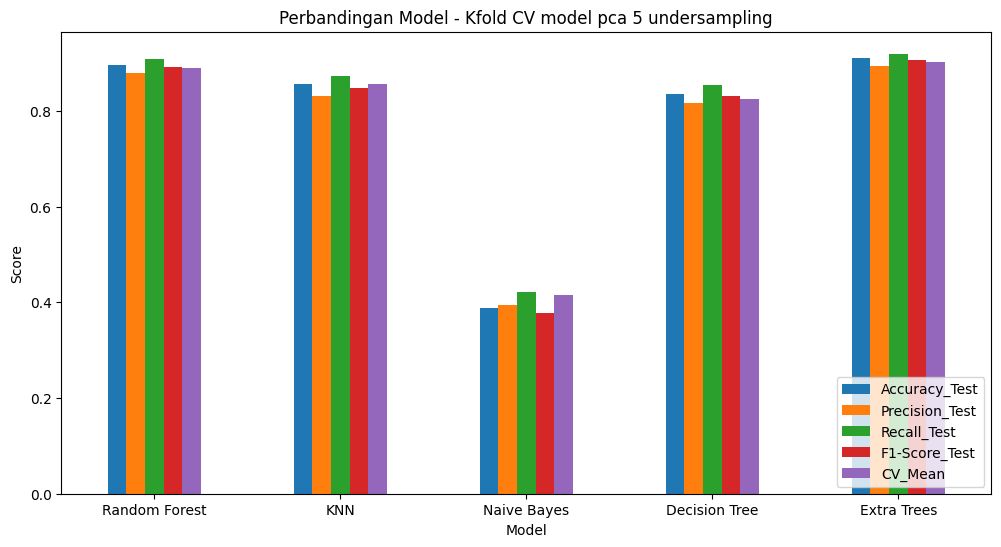

In [33]:
results = evaluate_models(
    X_train_pca, X_test_pca, y_train_rus, y_test,
    percobaan="Kfold CV model pca 5 undersampling",
    output_file="results.csv",
    cv=5  # jumlah fold cross-validation
)